In [337]:
# Comparing RO to INS data

import sys
sys.path.append("/Users/roberto/code/robust-me-scripts/scripts")
sys.path.append("/Users/roberto/code/robust-me-scripts/scripts/config")
from figs import plot
import motion

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os
from numpy import *

import module
import settings

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.titlepad'] = 20
plt.rcParams.update({'font.size': 28})
plt.rcParams['axes.grid'] = True
plt.rcParams['text.usetex'] = True
# text
plt.rc("font", family=settings.FONT_FAMILY)

module.set_sys_paths()

from mrg.logging import MonolithicDecoder
from mrg.adaptors.transform import PbSerialisedTransformToPython
from mrg.transform.conversions import se3_to_components, build_se3_transform

import numpy as np
from config.data import *

color_ro = u'#d62728' #red
color_kf = u'#ff7f0e' #orange
color_kfc = u'#1f77b4' #blue
color_ero = u'#2ca02c' #green
color_ins = 'black' #black

In [926]:
# dataset_path = "/Users/roberto/data/odometry-comparisons/rugged_ro/" \
#                "2018-06-21-15-58-58-rural-loop-v4-radar-leopon-trial-sunny-long-range/"
dataset_path = "/Users/roberto/data/odometry-comparisons/rugged_ro/" \
               "2018-06-21-16-24-39-long-hanborough-to-ori-V4-radar-leopon-trial-sunny-long-range/"
INS_relative_poses_path = dataset_path+"motion_estimation/ground-truth/flattened_novatel_generated_poses.monolithic"
RO_relative_poses_path = dataset_path+"motion_estimation/standard-ro/radar_motion_estimation.monolithic"
# ERO_relative_poses_path = dataset_path+"motion_estimation/enhanced-ro/radar_motion_estimation.monolithic"
KF_relative_poses_path = dataset_path+"motion_estimation/untuned-kalman-no-chi-all-good-labels/radar_motion_estimation.monolithic"
KFC_relative_poses_path = dataset_path+"motion_estimation/untuned-kalman-with-chi-all-good-labels/radar_motion_estimation.monolithic"
# ERO_relative_poses_path = dataset_path+"motion_estimation/untuned-kalman-with-chi-KFC-SVM-median-0.55thresh-labels/radar_motion_estimation.monolithic"
ERO_relative_poses_path = dataset_path+"motion_estimation/kfc-live-svm-thresh-0.2-N7/radar_motion_estimation.monolithic"
# ERO_relative_poses_path = dataset_path+"motion_estimation/kfc-live-svm-thresh0.6/900-2600-0.3thresh.monolithic"

# INS - open monolithic and iterate frames
print("reading INS_relative_poses_path: " + INS_relative_poses_path)
monolithic_decoder = MonolithicDecoder(
    INS_relative_poses_path)

# iterate mono
INS_se3s = []
INS_timestamps = []
for pb_serialised_transform, _, _ in monolithic_decoder:
    # adapt
    serialised_transform = PbSerialisedTransformToPython(
        pb_serialised_transform)
    INS_se3s.append(serialised_transform[0])
    INS_timestamps.append(serialised_transform[1])
    
# RO - open monolithic and iterate frames
print("reading RO_relative_poses_path: " + RO_relative_poses_path)
monolithic_decoder = MonolithicDecoder(
    RO_relative_poses_path)

# iterate mono
RO_se3s = []
RO_timestamps = []
for pb_serialised_transform, _, _ in monolithic_decoder:
    # adapt
    serialised_transform = PbSerialisedTransformToPython(
        pb_serialised_transform)
    RO_se3s.append(serialised_transform[0])
    RO_timestamps.append(serialised_transform[1])
    
# KF - open monolithic and iterate frames
print("reading KF_relative_poses_path: " + KF_relative_poses_path)
monolithic_decoder = MonolithicDecoder(
    KF_relative_poses_path)
# iterate mono
KF_se3s = []
KF_timestamps = []
for pb_serialised_transform, _, _ in monolithic_decoder:
    # adapt
    serialised_transform = PbSerialisedTransformToPython(
        pb_serialised_transform)
    KF_se3s.append(serialised_transform[0])
    KF_timestamps.append(serialised_transform[1])
    
# KFC - open monolithic and iterate frames
print("reading KFC_relative_poses_path: " + KFC_relative_poses_path)
monolithic_decoder = MonolithicDecoder(
    KFC_relative_poses_path)
# iterate mono
KFC_se3s = []
KFC_timestamps = []
for pb_serialised_transform, _, _ in monolithic_decoder:
    # adapt
    serialised_transform = PbSerialisedTransformToPython(
        pb_serialised_transform)
    KFC_se3s.append(serialised_transform[0])
    KFC_timestamps.append(serialised_transform[1])
    
    
# ERO - open monolithic and iterate frames
print("reading ERO_relative_poses_path: " + ERO_relative_poses_path)
monolithic_decoder = MonolithicDecoder(
    ERO_relative_poses_path)
# iterate mono
ERO_se3s = []
ERO_timestamps = []
for pb_serialised_transform, _, _ in monolithic_decoder:
    # adapt
    serialised_transform = PbSerialisedTransformToPython(
        pb_serialised_transform)
    ERO_se3s.append(serialised_transform[0])
    ERO_timestamps.append(serialised_transform[1])

reading INS_relative_poses_path: /Users/roberto/data/odometry-comparisons/rugged_ro/2018-06-21-16-24-39-long-hanborough-to-ori-V4-radar-leopon-trial-sunny-long-range/motion_estimation/ground-truth/flattened_novatel_generated_poses.monolithic
importing  protobuf.transform.pbSerialisedTransform_pb2
reading RO_relative_poses_path: /Users/roberto/data/odometry-comparisons/rugged_ro/2018-06-21-16-24-39-long-hanborough-to-ori-V4-radar-leopon-trial-sunny-long-range/motion_estimation/standard-ro/radar_motion_estimation.monolithic
importing  protobuf.transform.pbSerialisedTransform_pb2
reading KF_relative_poses_path: /Users/roberto/data/odometry-comparisons/rugged_ro/2018-06-21-16-24-39-long-hanborough-to-ori-V4-radar-leopon-trial-sunny-long-range/motion_estimation/untuned-kalman-no-chi-all-good-labels/radar_motion_estimation.monolithic
importing  protobuf.transform.pbSerialisedTransform_pb2
reading KFC_relative_poses_path: /Users/roberto/data/odometry-comparisons/rugged_ro/2018-06-21-16-24-39-

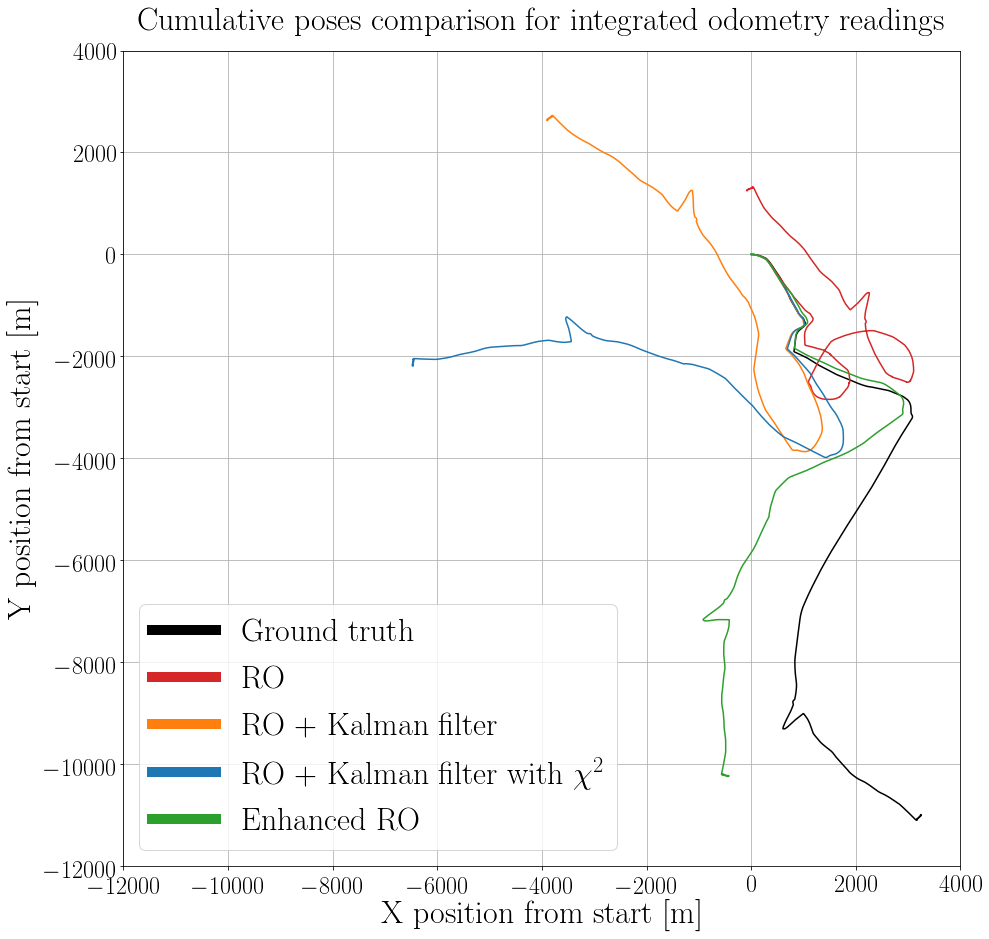

In [987]:
# get INS poses
INS_poses = []
pose = np.identity(4)
for i in range(len(INS_se3s)):
    pose = pose * INS_se3s[i]
    INS_poses.append(pose)

# get x,y coords
x_INS = [pose[0, 3] for pose in INS_poses]
y_INS = [pose[1, 3] for pose in INS_poses]
# downsample INS for figure rendering
x_INS_lite = x_INS[::10]
y_INS_lite = y_INS[::10]

# get RO poses
RO_poses = []
pose = np.identity(4)
for i in range(len(RO_se3s)):
    pose = pose * RO_se3s[i]
    RO_poses.append(pose)

# get x,y coords
x_RO = [pose[0, 3] for pose in RO_poses]
y_RO = [pose[1, 3] for pose in RO_poses]

# get KF poses
KF_poses = []
pose = np.identity(4)
for i in range(len(KF_se3s)):
    pose = pose * KF_se3s[i]
    KF_poses.append(pose)

# get x,y coords
x_KF = [pose[0, 3] for pose in KF_poses]
y_KF = [pose[1, 3] for pose in KF_poses]

# get KFC poses
KFC_poses = []
pose = np.identity(4)
for i in range(len(KFC_se3s)):
    pose = pose * KFC_se3s[i]
    KFC_poses.append(pose)

# get x,y coords
x_KFC = [pose[0, 3] for pose in KFC_poses]
y_KFC = [pose[1, 3] for pose in KFC_poses]

# get ERO poses
ERO_poses = []
pose = np.identity(4)
for i in range(len(ERO_se3s)):
    pose = pose * ERO_se3s[i]
    ERO_poses.append(pose)

# get x,y coords
x_ERO = [pose[0, 3] for pose in ERO_poses]
y_ERO = [pose[1, 3] for pose in ERO_poses]

plt.figure(figsize=(15,15))
plt.plot(x_INS_lite,y_INS_lite,'k-',markersize=1);
plt.plot(x_RO,y_RO,'-',color=color_ro,markersize=1);
plt.plot(x_KF,y_KF,'-',color=color_kf,markersize=1);
plt.plot(x_KFC,y_KFC,'-',color=color_kfc,markersize=1);
plt.plot(x_ERO,y_ERO,'-',color=color_ero,markersize=1);
# plt.axis('equal');
plt.title('Cumulative poses comparison for integrated odometry readings');
plt.xlabel('X position from start [m]');
plt.ylabel('Y position from start [m]');
line1, = plt.plot([],[],color=color_ins,label='Ground truth',linewidth=10.0)
line2, = plt.plot([],[],color=color_ro,label='RO',linewidth=10.0)
line3, = plt.plot([],[],color=color_kf,label='RO + Kalman filter',linewidth=10.0)
line4, = plt.plot([],[],color=color_kfc,label='RO + Kalman filter with $\chi^2$',linewidth=10.0)
line5, = plt.plot([],[],color=color_ero,label='Enhanced RO',linewidth=10.0)

plt.xlim([-12000,4000])
plt.ylim([-12000,4000])

# plt.axis('equal');


plt.legend(handles=[line1,line2,line3,line4,line5],loc='best')
plt.savefig(dataset_path+"figs/filename_all_5_poses.pdf",bbox_inches='tight',pad_inches = 0)

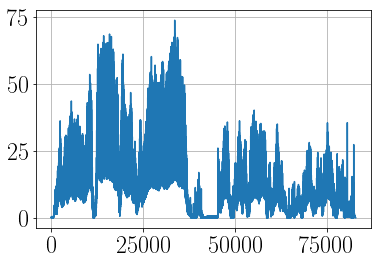

In [831]:
# get INS speeds
assert len(INS_se3s) == len(INS_timestamps)
INS_speeds = []
INS_TIMESTAMPS = []
deltatime_arr = []
for i in range(len(INS_timestamps) - 1):
# for i in range(0,len(timestamps) - 1,10): # this fixed the glitches by skipping them
# for i in range(1000,2000):
    # work out speed
    delta_time = INS_timestamps[i + 1] / settings.TIMESTAMP_CONVERSION \
        - INS_timestamps[i] / settings.TIMESTAMP_CONVERSION
    deltatime_arr.append(delta_time)
    se3 = INS_se3s[i]
    translation = se3[0:2, -1]
    incremental_distance = np.linalg.norm(translation)
    speed = incremental_distance / delta_time
    INS_speeds.append(speed)
    INS_TIMESTAMPS.append(INS_timestamps[i])
plt.plot(INS_speeds);

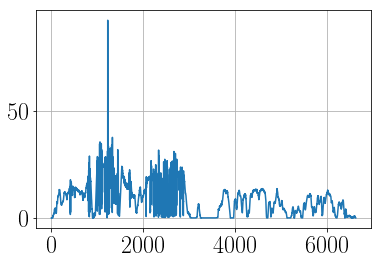

In [614]:
# get speeds
assert len(RO_se3s) == len(RO_timestamps)
RO_speeds = []
RO_TIMESTAMPS = []
deltatime_arr = []
for i in range(len(RO_timestamps) - 1):
# for i in range(0,len(timestamps) - 1,10): # this fixed the glitches by skipping them
# for i in range(1000,2000):
    # work out speed
    delta_time = RO_timestamps[i + 1] / settings.TIMESTAMP_CONVERSION \
        - RO_timestamps[i] / settings.TIMESTAMP_CONVERSION
    deltatime_arr.append(delta_time)
    se3 = RO_se3s[i]
    translation = se3[0:2, -1]
    incremental_distance = np.linalg.norm(translation)
    speed = incremental_distance / delta_time
    RO_speeds.append(speed)
    RO_TIMESTAMPS.append(RO_timestamps[i])
plt.plot(RO_speeds);

In [928]:
# get speeds
assert len(KF_se3s) == len(KF_timestamps)
KF_speeds = []
KF_TIMESTAMPS = []
deltatime_arr = []
for i in range(len(KF_timestamps) - 1):
    # work out speed
    delta_time = KF_timestamps[i + 1] / settings.TIMESTAMP_CONVERSION \
        - KF_timestamps[i] / settings.TIMESTAMP_CONVERSION
    deltatime_arr.append(delta_time)
    se3 = KF_se3s[i]
    translation = se3[0:2, -1]
    incremental_distance = np.linalg.norm(translation)
    speed = incremental_distance / delta_time
    KF_speeds.append(speed)
    KF_TIMESTAMPS.append(KF_timestamps[i])

assert len(KFC_se3s) == len(KFC_timestamps)
KFC_speeds = []
KFC_TIMESTAMPS = []
deltatime_arr = []
for i in range(len(KFC_timestamps) - 1):
    # work out speed
    delta_time = KFC_timestamps[i + 1] / settings.TIMESTAMP_CONVERSION \
        - KFC_timestamps[i] / settings.TIMESTAMP_CONVERSION
    deltatime_arr.append(delta_time)
    se3 = KFC_se3s[i]
    translation = se3[0:2, -1]
    incremental_distance = np.linalg.norm(translation)
    speed = incremental_distance / delta_time
    KFC_speeds.append(speed)
    KFC_TIMESTAMPS.append(KFC_timestamps[i])

assert len(ERO_se3s) == len(ERO_timestamps)
ERO_speeds = []
ERO_TIMESTAMPS = []
deltatime_arr = []
for i in range(len(ERO_timestamps) - 1):
# for i in range(0,len(timestamps) - 1,10): # this fixed the glitches by skipping them
# for i in range(1000,2000):
    # work out speed
    delta_time = ERO_timestamps[i + 1] / settings.TIMESTAMP_CONVERSION \
        - ERO_timestamps[i] / settings.TIMESTAMP_CONVERSION
    deltatime_arr.append(delta_time)
    se3 = ERO_se3s[i]
    translation = se3[0:2, -1]
    incremental_distance = np.linalg.norm(translation)
    speed = incremental_distance / delta_time
    ERO_speeds.append(speed)
    ERO_TIMESTAMPS.append(ERO_timestamps[i])
# plt.plot(ERO_speeds);

/Users/roberto/code/virtual-environments/ml-env-0/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/Users/roberto/code/virtual-environments/ml-env-0/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
/Users/roberto/code/virtual-environments/ml-env-0/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


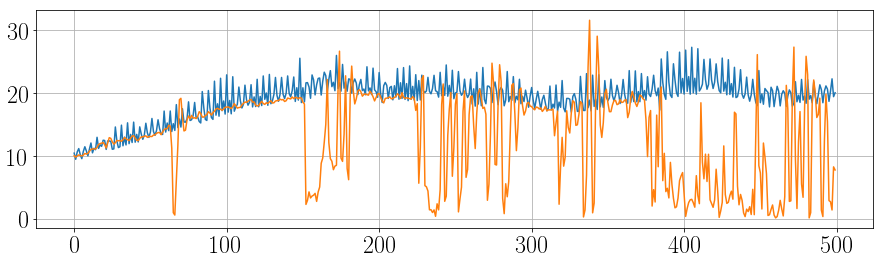

In [616]:
# Do interpolation (accumulatation for now)
interp_INS_speed = []
distance = 0
temp_speed = 0
j = 0
for i in range(len(RO_timestamps)):
    while(INS_timestamps[j] < RO_timestamps[i]):
        distance += INS_speeds[j]*(INS_timestamps[j]-INS_timestamps[j-1])
        j+=1
    temp_speed = distance/(RO_timestamps[i]-RO_timestamps[i-1])
    interp_INS_speed.append(temp_speed)
    distance = 0
plt.figure(figsize=(15,4))
plt.plot(interp_INS_speed[2000:2500])
plt.plot(RO_speeds[2000:2500])

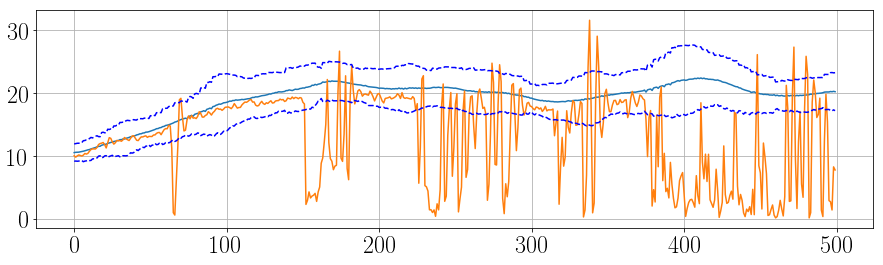

In [617]:
window_size = 20
std_devs = []
means = []
n_sigmas = 2
for i in range(window_size//2,len(interp_INS_speed)-window_size//2):
    window_contents = interp_INS_speed[i-window_size//2:i+window_size//2]
    std_devs.append(std(window_contents))
    means.append(mean(window_contents))
    
means = np.array(means)
means[-window_size//2:] = 0
means = np.roll(means,window_size//2)

std_devs = np.array(std_devs)
std_devs[-window_size//2:] = 0
std_devs = np.roll(std_devs,window_size//2)

plt.figure(figsize=(15,4))
plt.plot(means[2000:2500])
plt.plot(RO_speeds[2000:2500])
plt.plot(means[2000:2500]+n_sigmas*std_devs[2000:2500],'b--')
plt.plot(means[2000:2500]-n_sigmas*std_devs[2000:2500],'b--')
# plt.plot(means[2000:2500])
# plt.plot(RO_speeds[2005:2505])
# plt.plot(means[2000:2500]+n_sigmas*std_devs[2000:2500],'b--')
# plt.plot(means[2000:2500]-n_sigmas*std_devs[2000:2500],'b--')

In [618]:
# plt.figure(figsize=(30,8))
# plt.title('RO vs INS speeds with 2 std devs')
# plt.ylabel('Translational speeds (m/s)')
# plt.xlabel('Sample index')
# plt.plot(means)
# plt.plot(RO_speeds)
# plt.plot(means+n_sigmas*std_devs,'b--')
# plt.plot(means-n_sigmas*std_devs,'b--')
# # plt.plot(means+3*std_devs,'k--')
# # plt.plot(means-3*std_devs,'k--')
# plt.ylim(-5,100)

In [619]:
# Checking for failures based on speeds (not accelerations)
m = len(means)
upper_thresh = means + n_sigmas*std_devs
lower_thresh = means - n_sigmas*std_devs
minimum_speed_to_label = 0.5
label_reach_back = 0
classification = ones(m)*-1
for i in range(m):
    if(RO_speeds[i] < lower_thresh[i]) or RO_speeds[i] > upper_thresh[i]:
        if(means[i] > minimum_speed_to_label):
            classification[i-label_reach_back:i+1] = 1;
#     else:
#         classification[i+window_size//2,] = -1;

6616
6635
6634


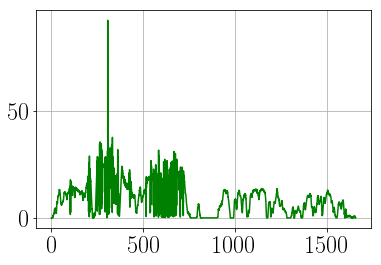

In [620]:
t_ro = np.array([x - RO_TIMESTAMPS[0] for x in RO_TIMESTAMPS])
t_ro = t_ro/1e6
t_ins = t_ro[:-19]
t_ero = t_ro[:-1]
plt.plot(t_ro,RO_speeds,'g-',markersize=0.5)
print(len(t_ins))
print(len(t_ro))
print(len(t_ero))

In [621]:
# Get error indices
labels = [] #zeros(len(EVec_timestamps))
for i in range(m):
    if(classification[i] == 1):
        labels.append(1)
    else:
        labels.append(-1)
print(size(labels))

6616


Detected failures: 695 of 6616 samples


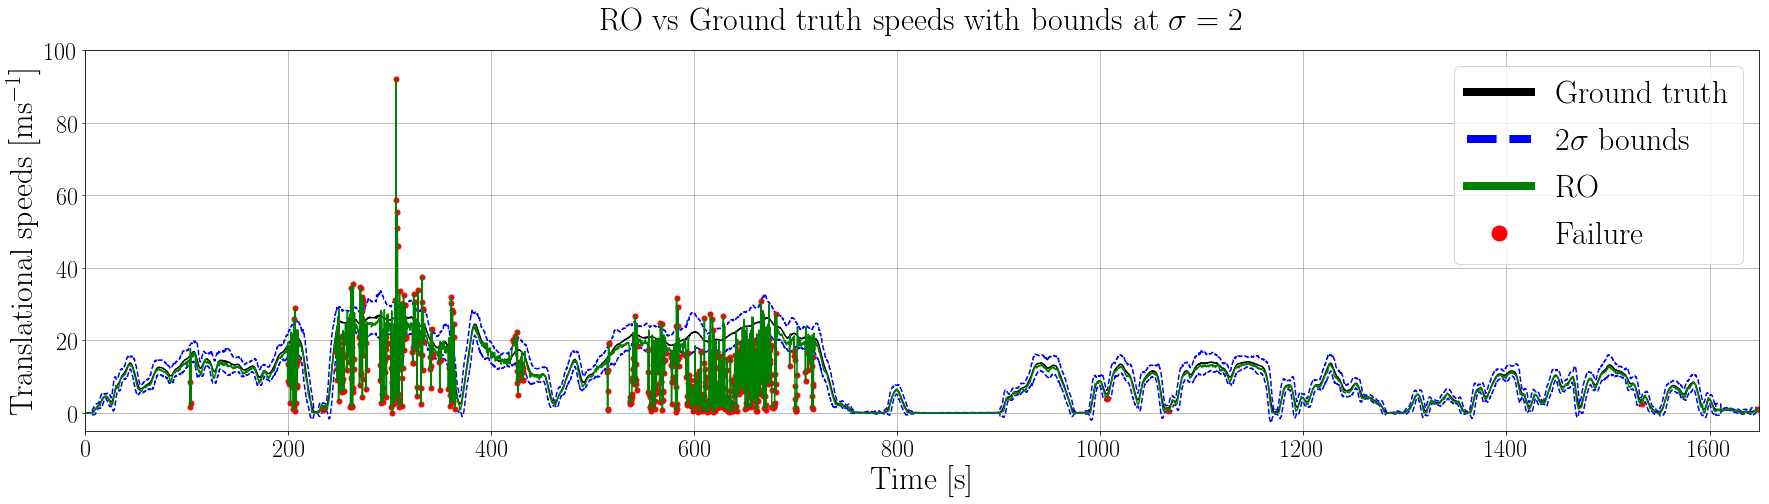

In [622]:
x_start = 0
x_finish = len(means)
plt.figure(figsize=(30,7))
plt.title('RO vs Ground truth speeds with bounds at $\sigma = 2$')
plt.ylabel('Translational speeds [ms$^{-1}]$')
plt.xlabel('Time [s]')
plt.plot(t_ins,means,'k')
plt.plot(t_ins,means+n_sigmas*std_devs,'b--')
plt.plot(t_ins,means-n_sigmas*std_devs,'b--')
for i in range(m):
    if(classification[i] == 1):
        plt.plot(t_ro[i],RO_speeds[i],'r.-',markersize=10)
#     else:
plt.plot(t_ro,RO_speeds,'g-',markersize=0.5) 
plt.ylim(-5,100)
plt.xlim(0,t_ins[-1])

line1, = plt.plot([],[],color='black',label='Ground truth',linewidth=8.0)
line2, = plt.plot([],[],'b--',label='2$\sigma$ bounds',linewidth=8.0)
line3, = plt.plot([],[],color='green',label='RO',linewidth=8.0)
line4, = plt.plot([],[],'r.',label='Failure',markersize=30)
plt.legend(handles=[line1,line2,line3,line4])

tally = np.count_nonzero(classification==1);

print('Detected failures:',tally,"of",m,'samples')
plt.savefig(dataset_path+"figs/filename_ro_translational_speeds.pdf",bbox_inches = 'tight',
    pad_inches = 0)

Detected failures: 560 of 6616 samples


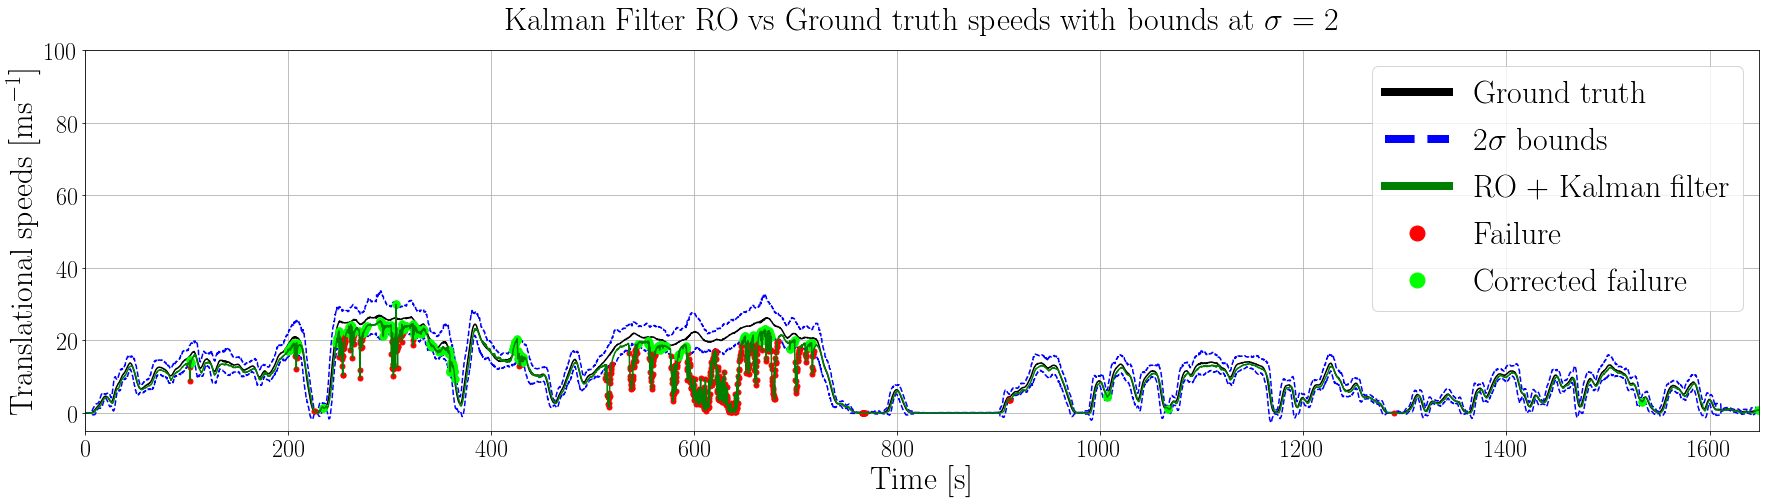

In [623]:
# KF RO
plt.figure(figsize=(30,7))
plt.title('Kalman Filter RO vs Ground truth speeds with bounds at $\sigma = 2$')
plt.ylabel('Translational speeds [ms$^{-1}]$')
plt.xlabel('Time [s]')
plt.plot(t_ins,means,'k')
plt.plot(t_ins,means+n_sigmas*std_devs,'b--')
plt.plot(t_ins,means-n_sigmas*std_devs,'b--')

KF_classification = ones(m)*-1
for i in range(m-1):
    if(KF_speeds[i] < lower_thresh[i]) or KF_speeds[i] > upper_thresh[i] and KF_speeds[i] > minimum_speed_to_label:
        KF_classification[i] = 1;

for i in range(m):
    if(KF_classification[i] == 1):
        plt.plot(t_ro[i],KF_speeds[i],'r.-',markersize=10)
for i in range(m):
    if(classification[i] == 1 and KF_classification[i] == -1):
        plt.plot(t_ro[i],KF_speeds[i],'.-',color=[0,1,0],markersize=15)
plt.plot(t_ro,KF_speeds,'g-',markersize=0.5) 
plt.ylim(-5,100)    
plt.xlim(0,t_ins[-1])

line1, = plt.plot([],[],color='black',label='Ground truth',linewidth=8.0)
line2, = plt.plot([],[],'b--',label='2$\sigma$ bounds',linewidth=8.0)
line3, = plt.plot([],[],color='green',label='RO + Kalman filter',linewidth=8.0)
line4, = plt.plot([],[],'r.',label='Failure',markersize=30)
line5, = plt.plot([],[],'.',color=[0,1,0],label='Corrected failure',markersize=30)
plt.legend(handles=[line1,line2,line3,line4,line5])

tally = np.count_nonzero(KF_classification==1);

print('Detected failures:',tally,"of",m,'samples')
plt.savefig(dataset_path+"figs/filename_kf_translational_speeds.pdf",bbox_inches='tight',pad_inches = 0)

Detected failures: 442 of 6616 samples


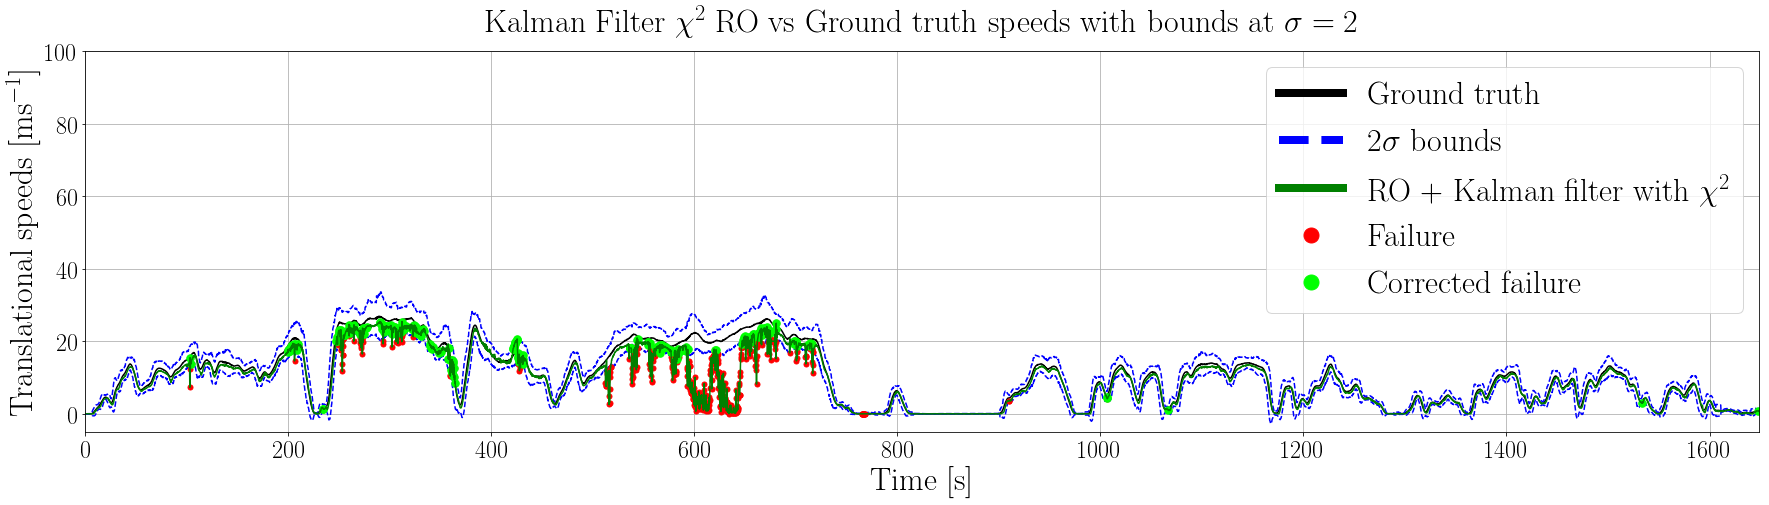

In [624]:
# KFC RO
plt.figure(figsize=(30,7))
plt.title('Kalman Filter $\chi^2$ RO vs Ground truth speeds with bounds at $\sigma = 2$')
plt.ylabel('Translational speeds [ms$^{-1}]$')
plt.xlabel('Time [s]')
plt.plot(t_ins,means,'k')
plt.plot(t_ins,means+n_sigmas*std_devs,'b--')
plt.plot(t_ins,means-n_sigmas*std_devs,'b--')

KFC_classification = ones(m)*-1
for i in range(m-1):
    if(KFC_speeds[i] < lower_thresh[i]) or KFC_speeds[i] > upper_thresh[i] and KFC_speeds[i] > minimum_speed_to_label:
        KFC_classification[i] = 1;

for i in range(m):
    if(KFC_classification[i] == 1):
        plt.plot(t_ro[i],KFC_speeds[i],'r.-',markersize=10)
for i in range(m):
    if(classification[i] == 1 and KFC_classification[i] == -1):
        plt.plot(t_ro[i],KFC_speeds[i],'.-',color=[0,1,0],markersize=15)
plt.plot(t_ro,KFC_speeds,'g-',markersize=0.5) 
plt.ylim(-5,100)    
plt.xlim(0,t_ins[-1])

line1, = plt.plot([],[],color='black',label='Ground truth',linewidth=8.0)
line2, = plt.plot([],[],'b--',label='2$\sigma$ bounds',linewidth=8.0)
line3, = plt.plot([],[],color='green',label='RO + Kalman filter with $\chi^2$',linewidth=8.0)
line4, = plt.plot([],[],'r.',label='Failure',markersize=30)
line5, = plt.plot([],[],'.',color=[0,1,0],label='Corrected failure',markersize=30)
plt.legend(handles=[line1,line2,line3,line4,line5])

tally = np.count_nonzero(KFC_classification==1);

print('Detected failures:',tally,"of",m,'samples')
plt.savefig(dataset_path+"figs/filename_kfc_translational_speeds.pdf",bbox_inches='tight',pad_inches = 0)

Detected failures: 531 of 6616 samples


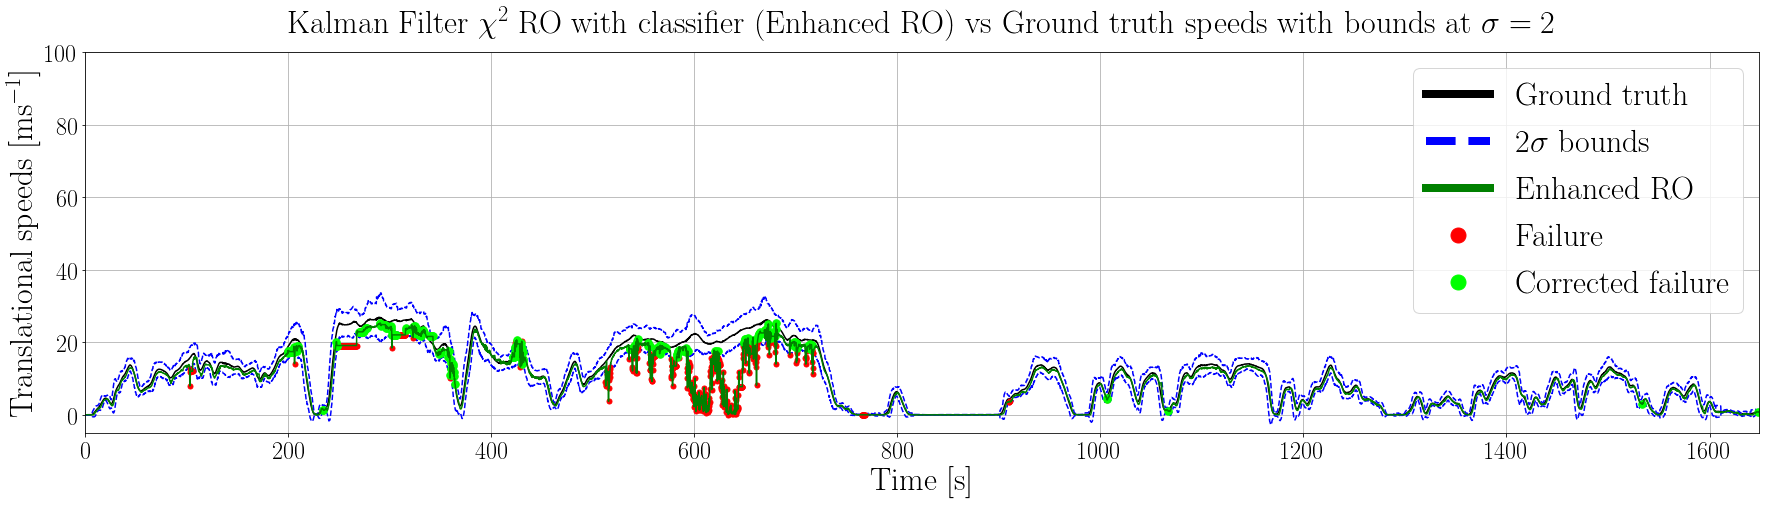

In [929]:
# Enhanced RO
plt.figure(figsize=(30,7))
plt.title('Kalman Filter $\chi^2$ RO with classifier (Enhanced RO) vs Ground truth speeds with bounds at $\sigma = 2$')
plt.ylabel('Translational speeds [ms$^{-1}]$')
plt.xlabel('Time [s]')
plt.plot(t_ins,means,'k')
plt.plot(t_ins,means+n_sigmas*std_devs,'b--')
plt.plot(t_ins,means-n_sigmas*std_devs,'b--')

# m = len(ERO_TIMESTAMPS)
ERO_classification = ones(m)*-1
for i in range(m-1):
    if(ERO_speeds[i] < lower_thresh[i]) or ERO_speeds[i] > upper_thresh[i] and ERO_speeds[i] > minimum_speed_to_label:
        ERO_classification[i] = 1;

for i in range(m):
    if(ERO_classification[i] == 1):
        plt.plot(t_ero[i],ERO_speeds[i],'r.-',markersize=10)
for i in range(m):
    if(classification[i] == 1 and ERO_classification[i] == -1):
        plt.plot(t_ero[i],ERO_speeds[i],'.-',color=[0,1,0],markersize=15)
plt.plot(t_ero,ERO_speeds[:-1],'g-',markersize=0.5) 
plt.ylim(-5,100)    
plt.xlim(0,t_ins[-1])
# plt.xlim([200,400])


line1, = plt.plot([],[],color='black',label='Ground truth',linewidth=8.0)
line2, = plt.plot([],[],'b--',label='2$\sigma$ bounds',linewidth=8.0)
line3, = plt.plot([],[],color='green',label='Enhanced RO',linewidth=8.0)
line4, = plt.plot([],[],'r.',label='Failure',markersize=30)
line5, = plt.plot([],[],'.',color=[0,1,0],label='Corrected failure',markersize=30)
plt.legend(handles=[line1,line2,line3,line4,line5])

tally = np.count_nonzero(ERO_classification==1);

print('Detected failures:',tally,"of",m,'samples')
plt.savefig(dataset_path+"figs/filename_ero_translational_speeds.pdf",bbox_inches='tight',pad_inches = 0)

(0, 4100)

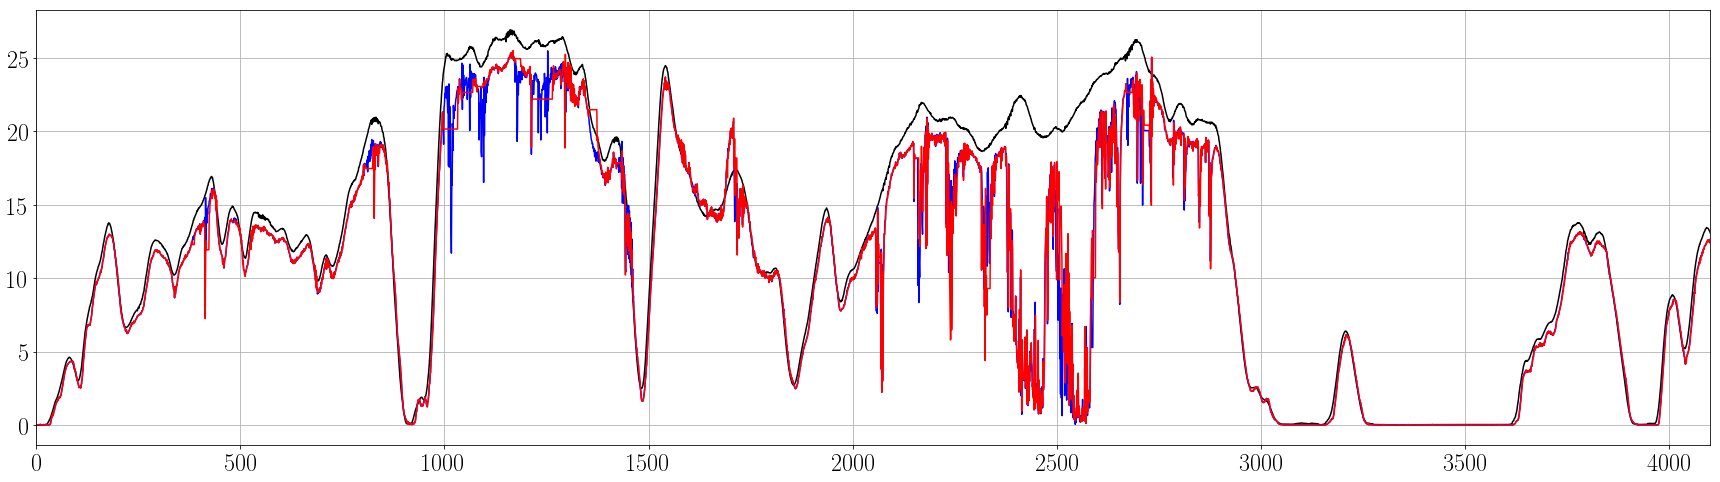

In [916]:
plt.figure(figsize=(30,8))
x1,x2 = 0,4100
plt.plot(means,'k')
plt.plot(KFC_speeds,'b')
plt.plot(np.linspace(x1,x1+len(ERO_speeds),len(ERO_speeds)),ERO_speeds,'r')
plt.xlim([x1,x2])

# idx = x2-x1
# KFC_classification = ones(idx)*-1
# for i in range(idx):
#     if(KFC_speeds[i] < lower_thresh[i]) or KFC_speeds[i] > upper_thresh[i] and KFC_speeds[i] > minimum_speed_to_label:
#         KFC_classification[i] = 1;
# idx = len(ERO_speeds)
# ERO_classification = ones(idx)*-1
# for i in range(idx-1):
#     if(ERO_speeds[i] < lower_thresh[i]) or ERO_speeds[i] > upper_thresh[i] and ERO_speeds[i] > minimum_speed_to_label:
#         ERO_classification[i] = 1;
# print('KFC fails:',count_nonzero(KFC_classification[x1:x2] == 1))
# print('ERO fails:',count_nonzero(ERO_classification == 1))


In [930]:
tmp_labels = np.array(labels) + 1
indices = np.where(tmp_labels) # get indices of failures
tmp_ro_speeds = np.array(RO_speeds)
ro_fail_vals = abs(means[indices] - tmp_ro_speeds[indices]) - n_sigmas*std_devs[indices]
print('Size of RO fails:',len(ro_fail_vals))

tmp_labels = np.array(KF_classification) + 1
indices = np.where(tmp_labels) # get indices of failures
tmp_kf_speeds = np.array(KF_speeds)
kf_fail_vals = abs(means[indices] - tmp_kf_speeds[indices])- n_sigmas*std_devs[indices]
print('Size of KF fails:',len(kf_fail_vals))

tmp_labels = np.array(KFC_classification) + 1
indices = np.where(tmp_labels) # get indices of failures
tmp_kfc_speeds = np.array(KFC_speeds)
kfc_fail_vals = abs(means[indices] - tmp_kfc_speeds[indices])- n_sigmas*std_devs[indices]
print('Size of KFC fails:',len(kfc_fail_vals))

tmp_labels = np.array(ERO_classification) + 1
indices = np.where(tmp_labels) # get indices of failures
tmp_ero_speeds = np.array(ERO_speeds)
ero_fail_vals = abs(means[indices] - tmp_ero_speeds[indices])- n_sigmas*std_devs[indices]
print('Size of ERO fails:',len(ero_fail_vals))

Size of RO fails: 695
Size of KF fails: 560
Size of KFC fails: 442
Size of ERO fails: 531


In [931]:
# tmp_labels = np.array(labels) + 1
# indices = np.where(tmp_labels) # get indices of failures
# tmp_ro_speeds = np.array(RO_speeds)
# ro_fail_vals = tmp_ro_speeds[indices] - means[indices]
# ro_fail_vals -= np.sign(ro_fail_vals) * n_sigmas*std_devs[indices]
# print('Size of RO fails:',len(ro_fail_vals))

# tmp_labels = np.array(KF_classification) + 1
# indices = np.where(tmp_labels) # get indices of failures
# tmp_kf_speeds = np.array(KF_speeds)
# kf_fail_vals = tmp_kf_speeds[indices] - means[indices]
# kf_fail_vals -= np.sign(kf_fail_vals) * n_sigmas*std_devs[indices]
# print('Size of KF fails:',len(kf_fail_vals))

# tmp_labels = np.array(KFC_classification) + 1
# indices = np.where(tmp_labels) # get indices of failures
# tmp_kfc_speeds = np.array(KFC_speeds)
# kfc_fail_vals = tmp_kfc_speeds[indices] - means[indices]
# kfc_fail_vals -= np.sign(kfc_fail_vals) * n_sigmas*std_devs[indices]
# print('Size of KFC fails:',len(kfc_fail_vals))

# tmp_labels = np.array(ERO_classification) + 1
# indices = np.where(tmp_labels) # get indices of failures
# tmp_ero_speeds = np.array(ERO_speeds)
# ero_fail_vals = tmp_ero_speeds[indices] - means[indices]
# ero_fail_vals -= np.sign(ero_fail_vals) * n_sigmas*std_devs[indices]
# print('Size of ERO fails:',len(ero_fail_vals))

In [932]:
print('Means:',
      mean(ro_fail_vals),
      mean(kf_fail_vals),
      mean(kfc_fail_vals),
      mean(ero_fail_vals))
print('Stds:',
     std(ro_fail_vals),
     std(kf_fail_vals),
     std(kfc_fail_vals),
     std(ero_fail_vals))

print()

print('Means:',
      mean(abs(ro_fail_vals)),
      mean(abs(kf_fail_vals)),
      mean(abs(kfc_fail_vals)),
      mean(abs(ero_fail_vals)))
print('Stds:',
     std(abs(ro_fail_vals)),
     std(abs(kf_fail_vals)),
     std(abs(kfc_fail_vals)),
     std(abs(ero_fail_vals)))

print()

print('RMS:',
      sqrt(sum(ro_fail_vals**2) / len(ro_fail_vals)),
      sqrt(sum(kf_fail_vals**2) / len(kf_fail_vals)),
      sqrt(sum(kfc_fail_vals**2) / len(kfc_fail_vals)),
      sqrt(sum(ero_fail_vals**2) / len(ero_fail_vals)))

Means: 9.089988989932255 6.828603562692267 6.795107397371288 5.86848456297896
Stds: 6.390622596320527 5.45320451632897 6.153449882377497 5.807768134011576

Means: 9.089988989932255 6.828603562692267 6.795107397371288 5.86848456297896
Stds: 6.390622596320527 5.45320451632897 6.153449882377497 5.807768134011576

RMS: 11.111613609448996 8.738836656748093 9.167247678378807 8.256469085775265


In [933]:
mean(ero_fail_vals) / len(ero_fail_vals) * len(kfc_fail_vals)

4.884877922479662

In [934]:
ro_tot_rmse = sqrt(sum((RO_speeds[:-19]-means)**2) / len(means))
kf_tot_rmse = sqrt(sum((KF_speeds[1:-19]-means[:-1])**2) / len(means))
kfc_tot_rmse = sqrt(sum((KFC_speeds[1:-19]-means[:-1])**2) / len(means))
ero_tot_rmse = sqrt(sum((ERO_speeds[1:-19]-means[:-1])**2) / len(means))

print('RMS:',ro_tot_rmse,kf_tot_rmse,kfc_tot_rmse,ero_tot_rmse)

RMS: 4.754820109747892 3.5669823463743535 3.26346635452759 3.2844197783344025


Text(0.5,0,'Error in translational speed [ms$^{-1}]$')

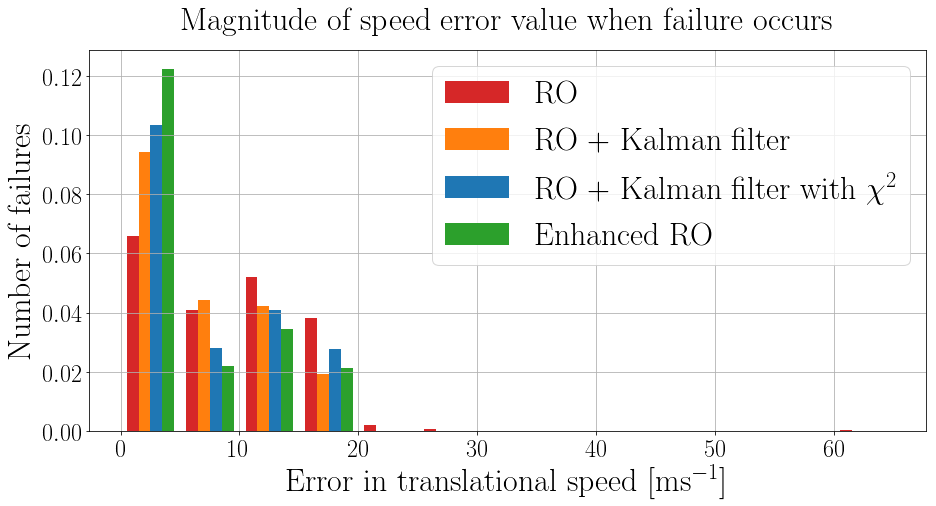

In [982]:
plt.figure(figsize=(15,7))
binwidth = 5
data_to_plot = [ro_fail_vals,kf_fail_vals,kfc_fail_vals,ero_fail_vals]
n,bins,_ = plt.hist(data_to_plot,bins=np.arange(min(ro_fail_vals), max(ro_fail_vals) + binwidth, binwidth),
                    density=True,
                    color=[color_ro,color_kf,color_kfc,color_ero],
                    label=['RO','RO + Kalman filter','RO + Kalman filter with $\chi^2$','Enhanced RO']);
plt.legend(loc='upper right')
plt.title('Magnitude of speed error value when failure occurs',fontsize=32,pad=20)
plt.ylabel('Number of failures')
plt.xlabel('Error in translational speed [ms$^{-1}]$')
# plt.savefig(dataset_path+"figs/filename_error_histogram.pdf",bbox_inches='tight',pad_inches = 0)

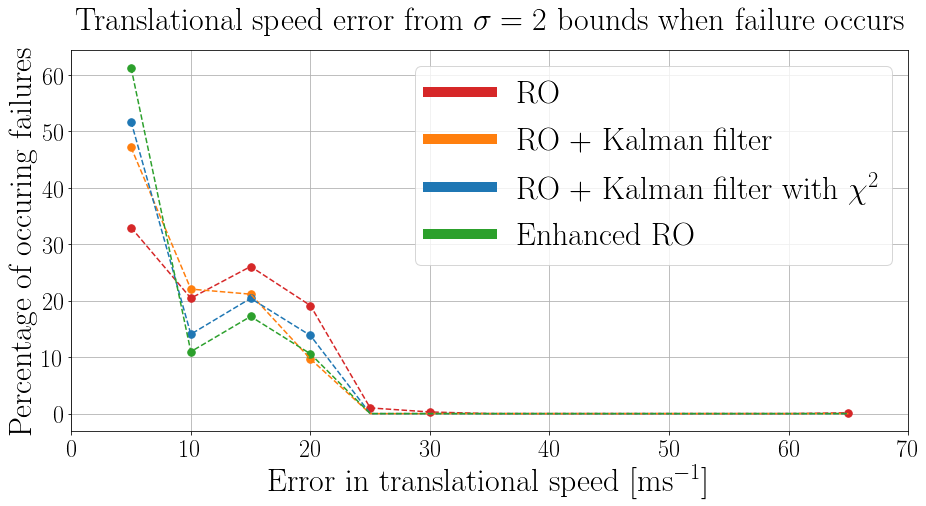

In [984]:
plt.figure(figsize=(15,7))
for i in range(len(n[0])):
    if(n[0][i] > 0):
        plt.plot(bins[i+1],n[0][i]*binwidth*100,'.-',color=color_ro,markersize=15);
    if(n[1][i] > 0):
        plt.plot(bins[i+1],n[1][i]*binwidth*100,'.-',color=color_kf,markersize=15);
    if(n[2][i] > 0):
        plt.plot(bins[i+1],n[2][i]*binwidth*100,'.-',color=color_kfc,markersize=15);
    if(n[3][i] > 0):
        plt.plot(bins[i+1],n[3][i]*binwidth*100,'.-',color=color_ero,markersize=15);
plt.plot(bins[1:],n[0]*binwidth*100,'--',color=color_ro);
plt.plot(bins[1:],n[1]*binwidth*100,'--',color=color_kf);
plt.plot(bins[1:],n[2]*binwidth*100,'--',color=color_kfc);
plt.plot(bins[1:],n[3]*binwidth*100,'--',color=color_ero);
plt.title('Translational speed error from $\sigma=2$ bounds when failure occurs')
# plt.ylabel('Number of failures')
plt.ylabel('Percentage of occuring failures')
plt.xlabel('Error in translational speed [ms$^{-1}]$')
line1, = plt.plot([],[],color=color_ro,label='RO',linewidth=10.0)
line2, = plt.plot([],[],color=color_kf,label='RO + Kalman filter',linewidth=10.0)
line3, = plt.plot([],[],color=color_kfc,label='RO + Kalman filter with $\chi^2$',linewidth=10.0)
line4, = plt.plot([],[],color=color_ero,label='Enhanced RO',linewidth=10.0)
plt.legend(handles=[line1,line2,line3,line4],loc='best')
plt.xlim([0,70])
plt.savefig(dataset_path+"figs/filename_error_counts.pdf",bbox_inches='tight',pad_inches = 0)

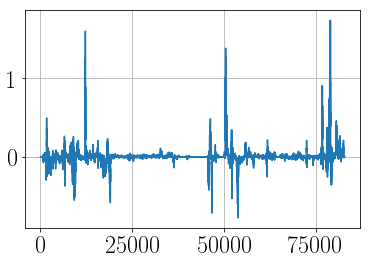

In [733]:
# INS yaw rates
assert len(INS_se3s) == len(INS_timestamps)
INS_yaw_rates = []
INS_TIMESTAMPS = []
for i in range(len(INS_timestamps) - 1):
    # work out yaw_rate
    delta_time = INS_timestamps[i + 1] / settings.TIMESTAMP_CONVERSION  \
        - INS_timestamps[i] / settings.TIMESTAMP_CONVERSION
    se3 = INS_se3s[i]
    xyzrpy = se3_to_components(se3)
    yaw_rate = xyzrpy[-1] / delta_time
    INS_yaw_rates.append(yaw_rate)
    INS_TIMESTAMPS.append(INS_timestamps[i])
plt.plot(INS_yaw_rates)

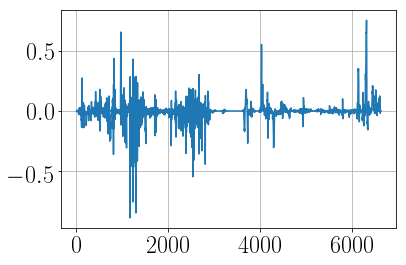

In [734]:
# RO yaw rates
assert len(RO_se3s) == len(RO_timestamps)
RO_yaw_rates = []
RO_TIMESTAMPS = []
for i in range(len(RO_timestamps) - 1):
    # work out yaw_rate
    delta_time = RO_timestamps[i + 1] / settings.TIMESTAMP_CONVERSION  \
        - RO_timestamps[i] / settings.TIMESTAMP_CONVERSION
    se3 = RO_se3s[i]
    xyzrpy = se3_to_components(se3)
    yaw_rate = xyzrpy[-1] / delta_time
    RO_yaw_rates.append(yaw_rate)
    RO_TIMESTAMPS.append(RO_timestamps[i])
plt.plot(RO_yaw_rates)

/Users/roberto/code/virtual-environments/ml-env-0/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


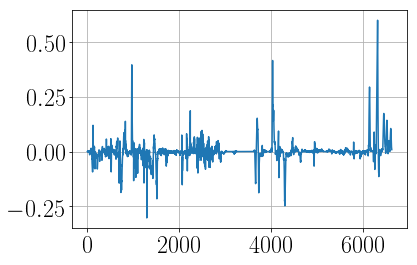

In [735]:
# KF yaw rates
assert len(KF_se3s) == len(KF_timestamps)
KF_yaw_rates = []
KF_TIMESTAMPS = []
for i in range(len(KF_timestamps) - 1):
    # work out yaw_rate
    delta_time = KF_timestamps[i + 1] / settings.TIMESTAMP_CONVERSION  \
        - KF_timestamps[i] / settings.TIMESTAMP_CONVERSION
    se3 = KF_se3s[i]
    xyzrpy = se3_to_components(se3)
    yaw_rate = xyzrpy[-1] / delta_time
    KF_yaw_rates.append(yaw_rate)
    KF_TIMESTAMPS.append(KF_timestamps[i])
plt.plot(KF_yaw_rates)

/Users/roberto/code/virtual-environments/ml-env-0/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


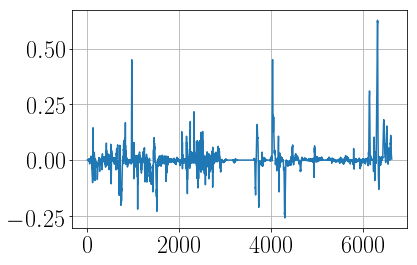

In [736]:
# KFC yaw rates
assert len(KFC_se3s) == len(KFC_timestamps)
KFC_yaw_rates = []
KFC_TIMESTAMPS = []
for i in range(len(KFC_timestamps) - 1):
    # work out yaw_rate
    delta_time = KFC_timestamps[i + 1] / settings.TIMESTAMP_CONVERSION  \
        - KFC_timestamps[i] / settings.TIMESTAMP_CONVERSION
    se3 = KFC_se3s[i]
    xyzrpy = se3_to_components(se3)
    yaw_rate = xyzrpy[-1] / delta_time
    KFC_yaw_rates.append(yaw_rate)
    KFC_TIMESTAMPS.append(KFC_timestamps[i])
plt.plot(KFC_yaw_rates)

/Users/roberto/code/virtual-environments/ml-env-0/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


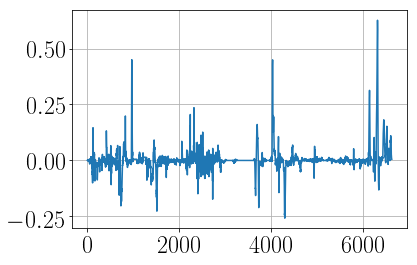

In [937]:
# ERO yaw rates
assert len(ERO_se3s) == len(ERO_timestamps)
ERO_yaw_rates = []
ERO_TIMESTAMPS = []
for i in range(len(ERO_timestamps) - 1):
    # work out yaw_rate
    delta_time = ERO_timestamps[i + 1] / settings.TIMESTAMP_CONVERSION  \
        - ERO_timestamps[i] / settings.TIMESTAMP_CONVERSION
    se3 = ERO_se3s[i]
    xyzrpy = se3_to_components(se3)
    yaw_rate = xyzrpy[-1] / delta_time
    ERO_yaw_rates.append(yaw_rate)
    ERO_TIMESTAMPS.append(ERO_timestamps[i])
plt.plot(ERO_yaw_rates)

(-2, 2)

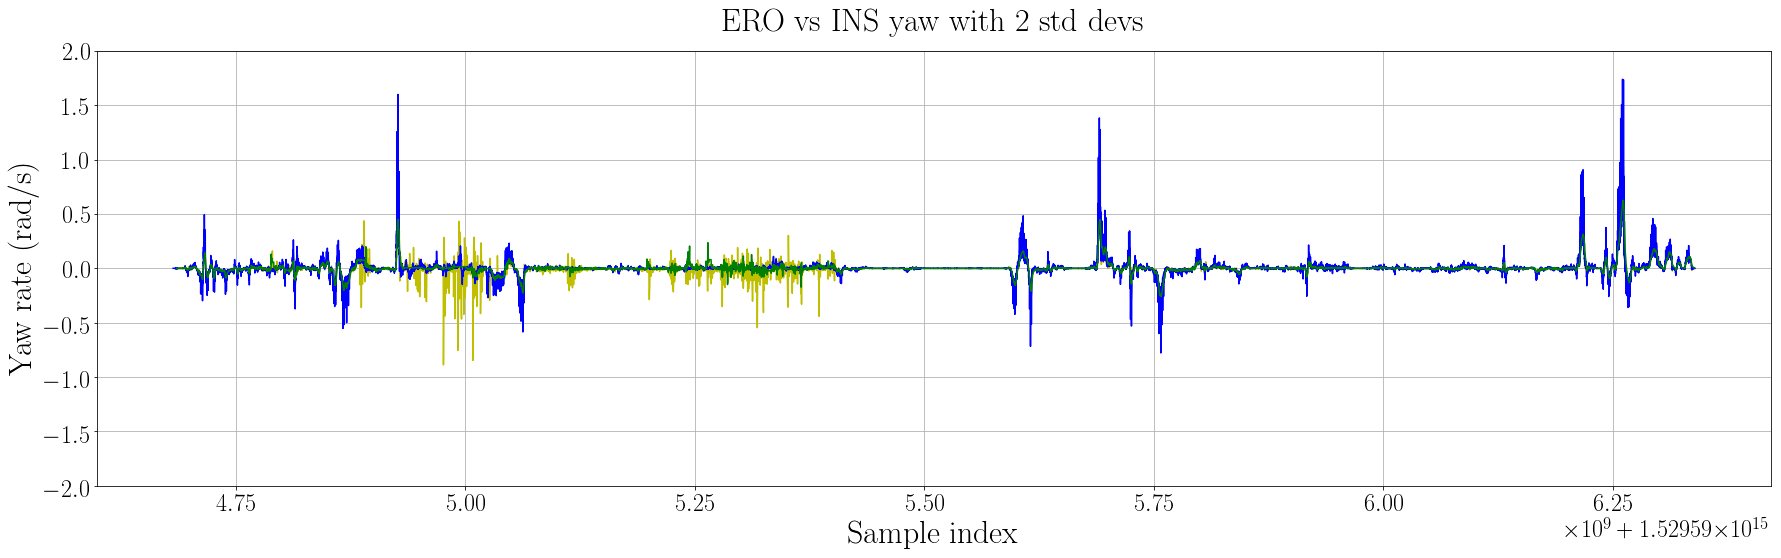

In [938]:
plt.figure(figsize=(30,8))
plt.title('ERO vs INS yaw with 2 std devs')
plt.ylabel('Yaw rate (rad/s)')
plt.xlabel('Sample index')
plt.plot(RO_TIMESTAMPS,RO_yaw_rates,'y',markersize=0.1)
plt.plot(INS_TIMESTAMPS,INS_yaw_rates,'b')
# for i in range(m):
#     if(ERO_classification[i] == 1):
#         plt.plot(i,ERO_yaw_rates[i],'r.-',markersize=10)
plt.plot(ERO_TIMESTAMPS,ERO_yaw_rates,'g')
plt.ylim(-2,2)

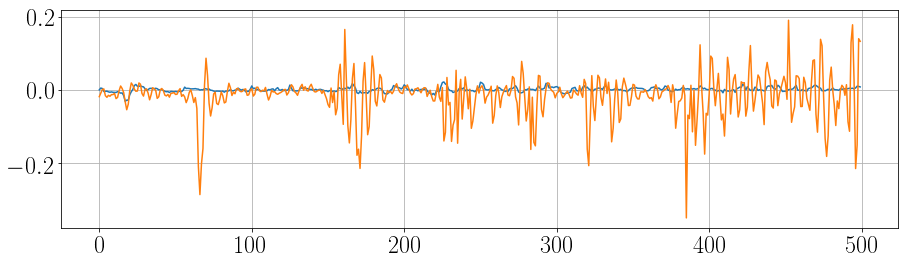

In [877]:
# Failures due to yaw rate
interp_INS_yaw = []
angle = 0
temp_angle = 0
j = 0
for i in range(len(RO_timestamps)):
    while(INS_timestamps[j] < RO_timestamps[i]):
        angle += INS_yaw_rates[j]*(INS_timestamps[j]-INS_timestamps[j-1])
        j+=1
    temp_angle = angle/(RO_timestamps[i]-RO_timestamps[i-1])
    interp_INS_yaw.append(temp_angle)
    angle = 0
plt.figure(figsize=(15,4))
plt.plot(interp_INS_yaw[2000:2500])
plt.plot(RO_yaw_rates[2000:2500])

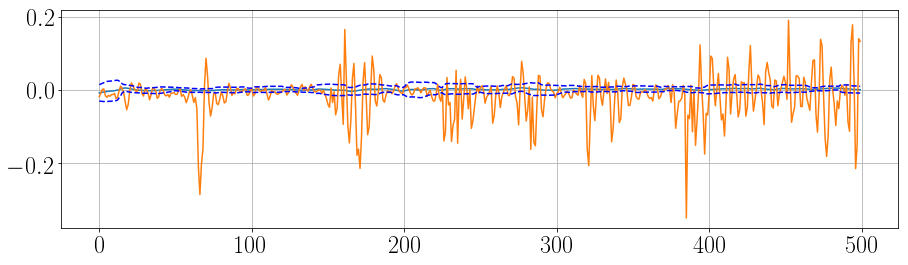

In [878]:
window_size = 20
yaw_std_devs = []
yaw_means = []
for i in range(window_size//2,len(interp_INS_yaw)-window_size//2):
    window_contents = interp_INS_yaw[i-window_size//2:i+window_size//2]
    yaw_std_devs.append(std(window_contents))
    yaw_means.append(mean(window_contents))
    
yaw_means = np.array(yaw_means)
yaw_std_devs = np.array(yaw_std_devs)
plt.figure(figsize=(15,4))
plt.plot(yaw_means[2005:2505])
plt.plot(RO_yaw_rates[2000:2500])
plt.plot(yaw_means[2005:2505]+n_sigmas*yaw_std_devs[2005:2505],'b--')
plt.plot(yaw_means[2005:2505]-n_sigmas*yaw_std_devs[2005:2505],'b--')

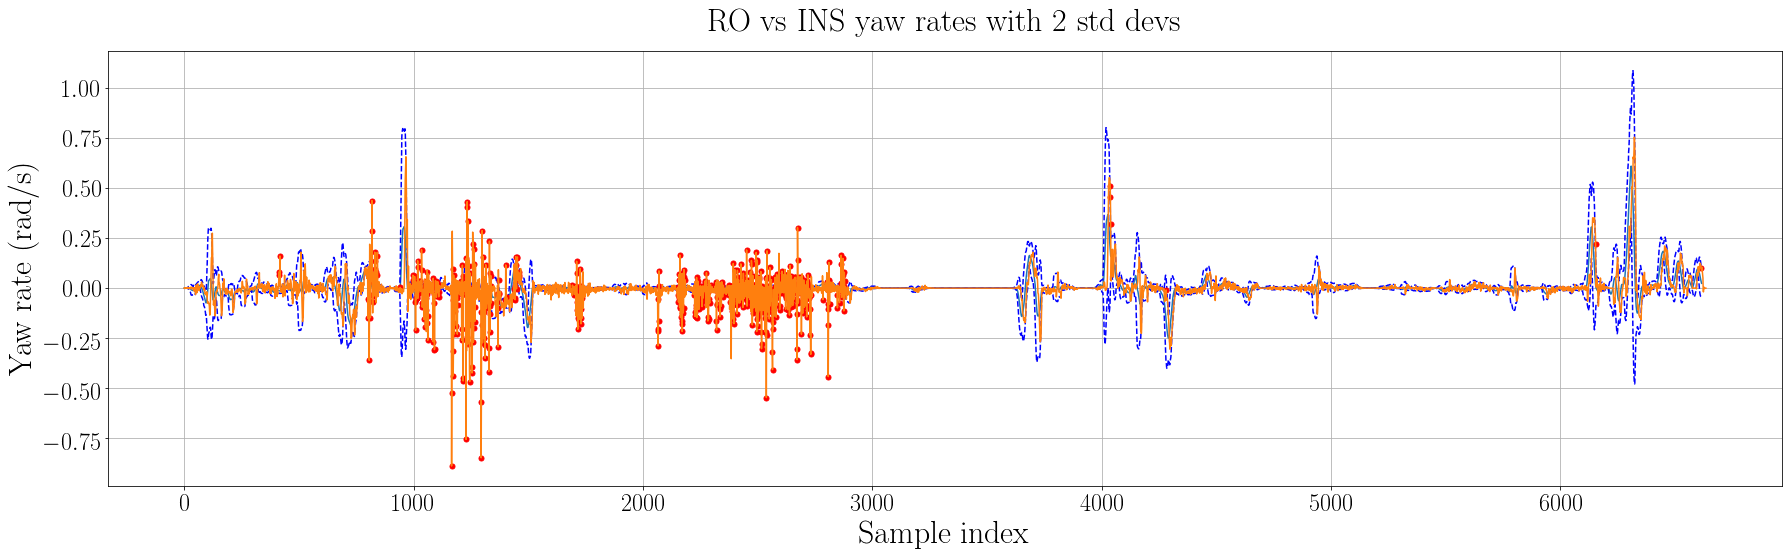

In [879]:
# Checking for failures based on yaw rates
m = len(yaw_means)
# max_tolerance = 0.2
yaw_upper_thresh = yaw_means + n_sigmas*yaw_std_devs
yaw_lower_thresh = yaw_means - n_sigmas*yaw_std_devs
# yaw_classification = zeros(m)
# for i in range(m):
#     if(RO_yaw_rates[i] < yaw_lower_thresh[i]) or RO_yaw_rates[i] > yaw_upper_thresh[i]:
#         yaw_classification[i] = 1;

plt.figure(figsize=(30,8))
plt.title('RO vs INS yaw rates with 2 std devs')
plt.ylabel('Yaw rate (rad/s)')
plt.xlabel('Sample index')
plt.plot(yaw_means)
plt.plot(yaw_means+n_sigmas*yaw_std_devs,'b--')
plt.plot(yaw_means-n_sigmas*yaw_std_devs,'b--')
for i in range(m):
    if(classification[i] == 1):
        plt.plot(i,RO_yaw_rates[i],'r.-',markersize=10)
plt.plot(RO_yaw_rates)

In [939]:
tmp_labels = np.array(labels) + 1
indices = np.where(tmp_labels) # get indices of failures
tmp_ro_yaw = np.array(RO_yaw_rates)
ro_fail_vals_yaw = abs(yaw_means[indices] - tmp_ro_yaw[indices]) #- n_sigmas*yaw_std_devs[indices]
print('Size of RO fails:',len(ro_fail_vals_yaw))

tmp_labels = np.array(KF_classification) + 1
indices = np.where(tmp_labels) # get indices of failures
tmp_kf_yaw = np.array(KF_yaw_rates)
kf_fail_vals_yaw = abs(yaw_means[indices] - tmp_kf_yaw[indices]) #- n_sigmas*yaw_std_devs[indices]
print('Size of KF fails:',len(kf_fail_vals_yaw))

tmp_labels = np.array(KFC_classification) + 1
indices = np.where(tmp_labels) # get indices of failures
tmp_kfc_yaw = np.array(KFC_yaw_rates)
kfc_fail_vals_yaw = abs(yaw_means[indices] - tmp_kfc_yaw[indices]) #- n_sigmas*yaw_std_devs[indices]
print('Size of KFC fails:',len(kfc_fail_vals_yaw))

tmp_labels = np.array(ERO_classification) + 1
indices = np.where(tmp_labels) # get indices of failures
tmp_ero_yaw = np.array(ERO_yaw_rates)
ero_fail_vals_yaw = abs(yaw_means[indices] - tmp_ero_yaw[indices]) #- n_sigmas*yaw_std_devs[indices]
print('Size of ERO fails:',len(ero_fail_vals_yaw))

Size of RO fails: 695
Size of KF fails: 560
Size of KFC fails: 442
Size of ERO fails: 531


In [940]:
print('Means:',
      mean(ro_fail_vals_yaw)*(180/pi),
      mean(kf_fail_vals_yaw)*(180/pi),
      mean(kfc_fail_vals_yaw)*(180/pi),
      mean(ero_fail_vals_yaw)*(180/pi))
print('Stds:',
      std(ro_fail_vals_yaw)*(180/pi),
      std(kf_fail_vals_yaw)*(180/pi),
      std(kfc_fail_vals_yaw)*(180/pi),
      std(ero_fail_vals_yaw)*(180/pi))

print('RMS under failure:',
      (sqrt(sum(ro_fail_vals_yaw**2) / len(ro_fail_vals_yaw)))*(180/pi),
      (sqrt(sum(kf_fail_vals_yaw**2) / len(kf_fail_vals_yaw)))*(180/pi),
      (sqrt(sum(kfc_fail_vals_yaw**2) / len(kfc_fail_vals_yaw)))*(180/pi),
      (sqrt(sum(ero_fail_vals_yaw**2) / len(ero_fail_vals_yaw)))*(180/pi))

ro_tot_rmse_yaw = sqrt(sum((RO_yaw_rates[:-19]-yaw_means)**2) / len(yaw_means))*(180/pi)
kf_tot_rmse_yaw = sqrt(sum((KF_yaw_rates[1:-19]-yaw_means[:-1])**2) / len(yaw_means))*(180/pi)
kfc_tot_rmse_yaw = sqrt(sum((KFC_yaw_rates[1:-19]-yaw_means[:-1])**2) / len(yaw_means))*(180/pi)
ero_tot_rmse_yaw = sqrt(sum((ERO_yaw_rates[1:-19]-yaw_means[:-1])**2) / len(yaw_means))*(180/pi)

print('RMS overall:',ro_tot_rmse_yaw,kf_tot_rmse_yaw,kfc_tot_rmse_yaw,ero_tot_rmse_yaw)
mean(RO_yaw_rates[:-19]-yaw_means)*(180/pi)

Means: 5.009263138534645 1.5264087068405836 1.737718390252375 1.6371155699597864
Stds: 5.900368464451939 1.6817600311920922 1.9063166529828308 1.779118084720674
RMS under failure: 7.739965452596083 2.2711759823567106 2.57947831649366 2.417727972453666
RMS overall: 3.898722598649343 2.826315392238115 2.7914360307739443 2.7943527831670787


-0.35746596111015955

In [941]:
ero_tot_rmse_yaw = sqrt(sum((ERO_yaw_rates[1:-19]-yaw_means[:-1])**2) / len(yaw_means))*(180/pi)
print((sqrt(sum(ero_fail_vals_yaw**2) / len(ero_fail_vals_yaw)))*(180/pi))
print(ero_tot_rmse_yaw)


2.417727972453666
2.7943527831670787


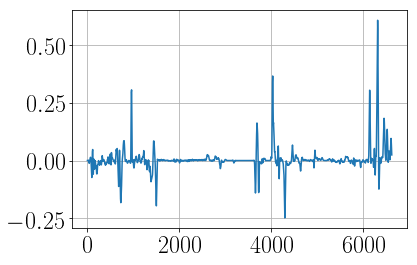

In [757]:
plt.plot(yaw_means)

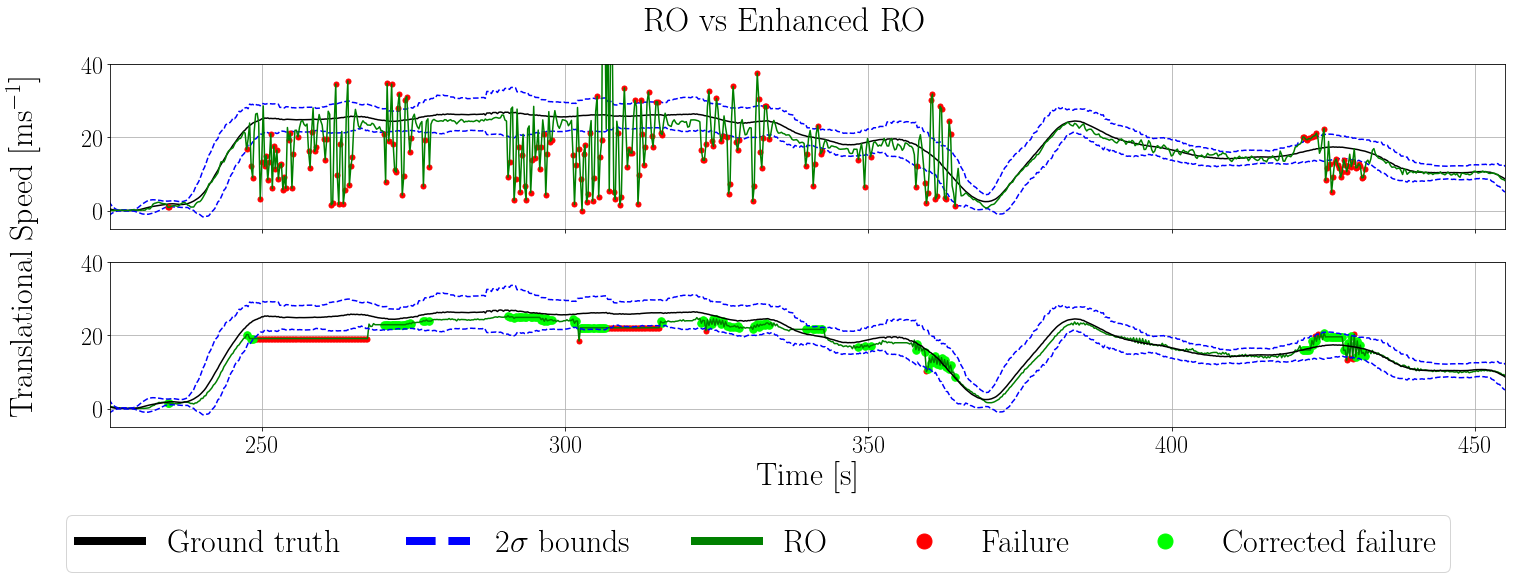

In [988]:
# Enhanced RO for Fig 1
f, axarr = plt.subplots(2, sharex=True,sharey=True,figsize=(25,8))
# add a big axes, hide frame
f.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel('Time [s]')
plt.ylabel('Translational Speed [ms$^{-1}$]')
f.suptitle('RO vs Enhanced RO')

axarr[0].plot(t_ins,means,'k')
axarr[0].plot(t_ins,means+n_sigmas*std_devs,'b--')
axarr[0].plot(t_ins,means-n_sigmas*std_devs,'b--')

for i in range(m):
    if(classification[i] == 1):
        axarr[0].plot(t_ro[i],RO_speeds[i],'r.-',markersize=10)
axarr[0].plot(t_ro,RO_speeds,'g-',markersize=0.5) 

axarr[0].set_ylim([-5,40])    
# # plt.xlim(0,t_ins[-1])
# axarr[0].set_xlim([460,750])
axarr[0].set_xlim([225,455])


ERO_classification = ones(m)*-1
for i in range(m-1):
    if(ERO_speeds[i] < lower_thresh[i]) or ERO_speeds[i] > upper_thresh[i] and ERO_speeds[i] > minimum_speed_to_label:
        ERO_classification[i] = 1;

for i in range(m):
    if(ERO_classification[i] == 1):
        axarr[1].plot(t_ero[i],ERO_speeds[i],'r.-',markersize=10)
for i in range(m):
    if(classification[i] == 1 and ERO_classification[i] == -1):
        axarr[1].plot(t_ero[i],ERO_speeds[i],'.-',color=[0,1,0],markersize=15)
axarr[1].plot(t_ero,ERO_speeds[:-1],'g-',markersize=0.5) 
axarr[1].plot(t_ins,means,'k')
axarr[1].plot(t_ins,means+n_sigmas*std_devs,'b--')
axarr[1].plot(t_ins,means-n_sigmas*std_devs,'b--')

# f.subplots_adjust(right=0.8)
# f.subplots_adjust(top = 0.8)
f.subplots_adjust(bottom = 0.25)


# Put a legend to the right of the current axis
line1, = plt.plot([],[],color='black',label='Ground truth',linewidth=8.0)
line2, = plt.plot([],[],'b--',label='2$\sigma$ bounds',linewidth=8.0)
line3, = plt.plot([],[],color='green',label='RO',linewidth=8.0)
line4, = plt.plot([],[],'r.',label='Failure',markersize=30)
line5, = plt.plot([],[],'.',color=[0,1,0],label='Corrected failure',markersize=30)
# f.legend(loc='center right',handles=[line1,line2,line3,line4,line5],borderaxespad=0.1)
f.legend(loc='lower center',handles=[line1,line2,line3,line4,line5],borderaxespad=0.1,ncol=5)


f.savefig(dataset_path+"figs/filename_section_ero_translational_speeds.pdf",bbox_inches='tight',pad_inches = 0)